In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandarallel import pandarallel


In [ ]:
import os
import requests
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import spacy 
from spacy import displacy

In [5]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
import multiprocessing

num_processors = multiprocessing.cpu_count()
workers = num_processors-1
print(f'Available CPUs: {num_processors}')

Available CPUs: 16


In [9]:
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [10]:
df_neg = pd.read_csv('neg_text_custom.csv')

In [ ]:
!python3 -m spacy download en_core_web_lg

In [13]:
nlp = spacy.load("en_core_web_lg")

In [15]:
entities = []
labels = []
position_start = []
position_end = []

for line in df_neg["clean_text"]:
    doc = nlp(line)
    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        position_start.append(ent.start_char)
        position_end.append(ent.end_char)
    
df_spacy_custom = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

In [16]:
df_spacy_custom.to_csv("spacy_negative_custom_classifier.csv", index = False)

In [17]:
skip_list =  ['Data Science', 'data science', 'DATA SCIENCE','AI', 'ai', 'artificial intelligence','Artificial Intelligence','ARTIFICIAL INTELLIGENCE', 'ML', 'NLP', 
            'Artificial General Intelligence','Chatbots', 'AI Marketplaces', 'Intelligent Applications', 
           'Augmented Intelligence', 'Decision Intelligence', 'AI Cloud Services', 'cloud services', 'GPU Accelerators', 'Computer Vision','Deep Neural Network',
           'Deep Learning','Cognitive Computing','Autonomous Vehicles','Knowledge Graphs', 'Responsible AI', 'Machine Customers', 'Decision Intelligence', 'Autonomous Vehicles',
           'Human-Centered AI', 'AI Governance', 'Natural Language Processing', 'Machine Learning', 'Smart Robots', 'Operational AI Systems' , 'Data-Centric AI', 'AI TRiSM', 'Generative AI',
           'Responsible AI']

In [ ]:
# orgnization

# Filter by organization labels
org_labels_df = df_spacy_custom[df_spacy_custom['Labels'] == 'ORG']

# Convert entities to string and remove any that contain skip terms
org_labels_df['Entities'] = org_labels_df['Entities'].apply(str)
org_labels_df = org_labels_df[~org_labels_df['Entities'].str.contains('|'.join(skip_list), case=False)]

# Group by entities and count occurrences
org_count_df = org_labels_df.groupby('Entities').count().sort_values(by='Labels', ascending=False)


In [ ]:
# person

# Filter by person labels
person_entities = df_spacy_custom[df_spacy_custom["Labels"]=="PERSON"]

# Convert entities to string and remove any that contain skip terms
person_entities["Entities"] = person_entities["Entities"].apply(str)
person_entities = person_entities[~person_entities['Entities'].str.contains('|'.join(skip_list), case=False)]

# Group by entities and count occurrences
count_person_entities = person_entities.groupby("Entities").count().sort_values(by="Labels", ascending=False)

In [ ]:
# location
# Filter by location labels
loc_df_custom = df_spacy_custom[df_spacy_custom["Labels"]=="LOC"]

# Convert entities to string and remove any that contain skip terms
loc_df_custom["Entities"] = loc_df_custom["Entities"].apply(str)
loc_df_custom = loc_df_custom[~loc_df_custom['Entities'].str.contains('|'.join(skip_list), case=False)]

# Group by entities and count occurrences
count_df_spacy_loc_custom = loc_df_custom.groupby("Entities").count().sort_values(by = "Labels", ascending = False)

In [23]:
count_df_spacy_org_top_20 = org_count_df.sort_values(by = ['Labels'], ascending = False).head(20).rename(columns = {"Labels":"Count"})
count_df_spacy_org_top_20[["Count"]]

,Count
Entities,
Google,69502
Microsoft,36637
ChatGPT,31702
Facebook,23283
IBM,19720
Amazon,19297
NASDAQ,18348
NYSE,17667
NVIDIA,13992


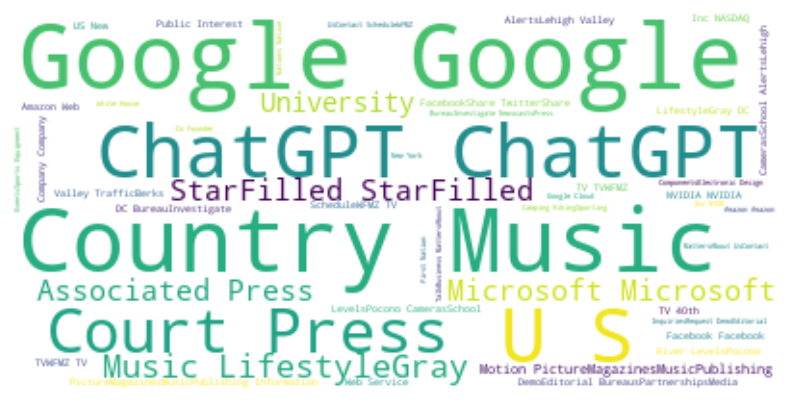

In [24]:
text = " ".join(entities for entities in org_labels_df.Entities)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Data Science', 'data science', 'DATA SCIENCE','AI', 'ai', 'artificial intelligence','Artificial Intelligence','ARTIFICIAL INTELLIGENCE', 'ML', 'NLP', 
            'Artificial General Intelligence','Chatbots', 'AI Marketplaces', 'Intelligent Applications', 
           'Augmented Intelligence', 'Decision Intelligence', 'AI Cloud Services', 'cloud services', 'GPU Accelerators', 'Computer Vision','Deep Neural Network',
           'Deep Learning','Cognitive Computing','Autonomous Vehicles','Knowledge Graphs', 'Responsible AI', 'Machine Customers', 'Decision Intelligence', 'Autonomous Vehicles',
           'Human-Centered AI', 'AI Governance', 'Natural Language Processing', 'Machine Learning', 'Smart Robots', 'Operational AI Systems' , 'Data-Centric AI', 'AI TRiSM', 'Generative AI',
           'Responsible AI'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
count_df_spacy_person_top_20 = count_person_entities.sort_values(by = ['Labels'], ascending = False).head(20).rename(columns = {"Labels":"Count"})
count_df_spacy_person_top_20[["Count"]]

,Count
Entities,
Biden,5663
Greta Van SusterenCircle - Country,5595
Trump,5498
RecipesMr,4575
Elon Musk,4541
Musk,4129
HardwareComputer SoftwareConsumer,3553
HardwareComputer SoftwareData,3393
Jones,2970


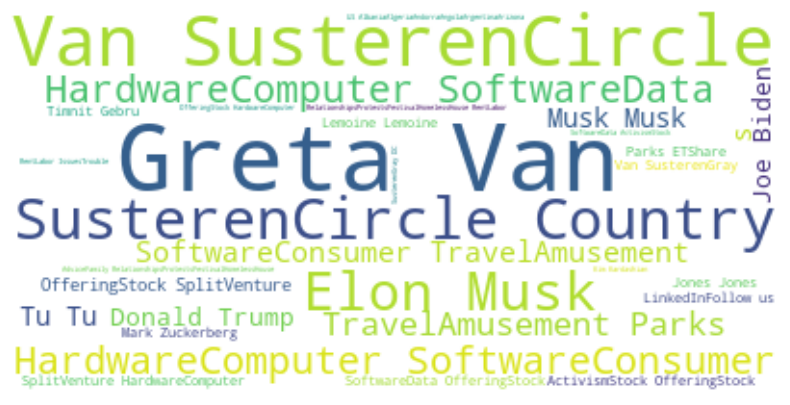

In [26]:
text = " ".join(entities for entities in person_entities.Entities.apply(str))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Data Science', 'data science', 'DATA SCIENCE','AI', 'ai', 'artificial intelligence','Artificial Intelligence','ARTIFICIAL INTELLIGENCE', 'ML', 'NLP', 
            'Artificial General Intelligence','Chatbots', 'AI Marketplaces', 'Intelligent Applications', 
           'Augmented Intelligence', 'Decision Intelligence', 'AI Cloud Services', 'cloud services', 'GPU Accelerators', 'Computer Vision','Deep Neural Network',
           'Deep Learning','Cognitive Computing','Autonomous Vehicles','Knowledge Graphs', 'Responsible AI', 'Machine Customers', 'Decision Intelligence', 'Autonomous Vehicles',
           'Human-Centered AI', 'AI Governance', 'Natural Language Processing', 'Machine Learning', 'Smart Robots', 'Operational AI Systems' , 'Data-Centric AI', 'AI TRiSM', 'Generative AI',
           'Responsible AI'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
count_df_spacy_loc_top_20 = count_df_spacy_loc_custom.sort_values(by = ['Labels'], ascending = False).head(20).rename(columns = {"Labels":"Count"})
count_df_spacy_loc_top_20[["Count"]]

,Count
Entities,
Europe,13405
North America,5992
Asia,4853
Africa,4760
Silicon Valley,3049
Earth,2794
Asia Pacific,1432
Latin America,1410
Mars,1363


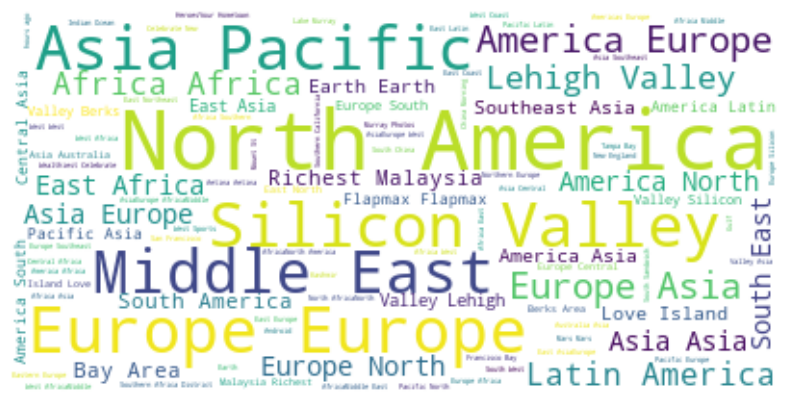

In [28]:
text = " ".join(entities for entities in loc_df_custom.Entities.apply(str))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Data Science', 'data science', 'DATA SCIENCE','AI', 'ai', 'artificial intelligence','Artificial Intelligence','ARTIFICIAL INTELLIGENCE', 'ML', 'NLP', 
            'Artificial General Intelligence','Chatbots', 'AI Marketplaces', 'Intelligent Applications', 
           'Augmented Intelligence', 'Decision Intelligence', 'AI Cloud Services', 'cloud services', 'GPU Accelerators', 'Computer Vision','Deep Neural Network',
           'Deep Learning','Cognitive Computing','Autonomous Vehicles','Knowledge Graphs', 'Responsible AI', 'Machine Customers', 'Decision Intelligence', 'Autonomous Vehicles',
           'Human-Centered AI', 'AI Governance', 'Natural Language Processing', 'Machine Learning', 'Smart Robots', 'Operational AI Systems' , 'Data-Centric AI', 'AI TRiSM', 'Generative AI',
           'Responsible AI'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()